I'll begin by creating a dataframe for the historic arrest dataset first then the year-to-date data

In [ ]:
import pandas as pd
historic = pd.read_csv('/content/NYPD_Arrests_Data__Historic__20240914.csv')

In [ ]:
historic.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,220756993,11/19/2020,155.0,RAPE 2,104.0,RAPE,PL 1303001,F,B,41,0.0,18-24,M,BLACK,1013232.0,236725.0,40.816392,-73.895296,POINT (-73.89529641399997 40.816391847000034)
1,221995093,12/18/2020,177.0,SEXUAL ABUSE,116.0,SEX CRIMES,PL 1306503,F,K,84,0.0,45-64,M,WHITE,989013.0,192652.0,40.695469,-73.982825,POINT (-73.98282507899995 40.69546894100006)
2,221558560,12/09/2020,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,S,120,0.0,<18,M,BLACK,962748.0,174174.0,40.644726,-74.077483,POINT (-74.07748315899995 40.64472613100002)
3,217890363,09/15/2020,NaN,NaN,NaN,NaN,PL 2650022,M,B,44,0.0,25-44,M,BLACK,1009412.0,245306.0,40.839956,-73.909065,POINT (-73.90906496999997 40.83995593800007)
4,219517698,10/21/2020,153.0,RAPE 3,104.0,RAPE,PL 1302502,F,Q,112,0.0,25-44,M,WHITE HISPANIC,1025420.0,202485.0,40.722364,-73.851474,POINT (-73.85147389399998 40.72236368700004)


In [ ]:
ytd = pd.read_csv('/content/NYPD_Arrest_Data__Year_to_Date__20240914.csv')

In [ ]:
ytd.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,279884335,01/03/2024,153.0,RAPE 3,104.0,RAPE,PL 1302503,F,K,77,0,45-64,M,BLACK,1003509,185018,40.674496,-73.930571,POINT (-73.9305713255961 40.6744956865259)
1,279876234,01/03/2024,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,101,0,25-44,M,BLACK,1053648,158969,40.602740,-73.750081,POINT (-73.750081 40.60274)
2,279939192,01/04/2024,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1201001,F,K,83,0,45-64,M,BLACK,1007127,193705,40.698323,-73.917495,POINT (-73.917495 40.698323)
3,280561026,01/15/2024,203.0,"TRESPASS 3, CRIMINAL",352.0,CRIMINAL TRESPASS,PL 140100A,M,S,121,0,18-24,M,BLACK,942827,166373,40.623238,-74.149217,POINT (-74.149217 40.623238)
4,280084387,01/07/2024,223.0,"BURGLARY,RESIDENCE,NIGHT",107.0,BURGLARY,PL 1403002,F,Q,107,0,45-64,M,BLACK,1036732,206997,40.734681,-73.810626,POINT (-73.810626 40.734681)


# Question 1

Will begin by getting the number of arrests for each year

In [ ]:
historic['ARREST_DATE'] = pd.to_datetime(historic['ARREST_DATE'])
years = [2019, 2020, 2021, 2022, 2023]
f_historic = historic[historic['ARREST_DATE'].dt.year.isin(years)]

In [ ]:
ytd['ARREST_DATE'] = pd.to_datetime(ytd['ARREST_DATE'])
years2 = [2024]
f_ytd = ytd[ytd['ARREST_DATE'].dt.year.isin(years2)] # just to make sure

In [ ]:
f_historic.head(10)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,220756993,2020-11-19,155.0,RAPE 2,104.0,RAPE,PL 1303001,F,B,41,0.0,18-24,M,BLACK,1013232.0,236725.0,40.816392,-73.895296,POINT (-73.89529641399997 40.816391847000034)
1,221995093,2020-12-18,177.0,SEXUAL ABUSE,116.0,SEX CRIMES,PL 1306503,F,K,84,0.0,45-64,M,WHITE,989013.0,192652.0,40.695469,-73.982825,POINT (-73.98282507899995 40.69546894100006)
2,221558560,2020-12-09,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,S,120,0.0,<18,M,BLACK,962748.0,174174.0,40.644726,-74.077483,POINT (-74.07748315899995 40.64472613100002)
3,217890363,2020-09-15,NaN,NaN,NaN,NaN,PL 2650022,M,B,44,0.0,25-44,M,BLACK,1009412.0,245306.0,40.839956,-73.909065,POINT (-73.90906496999997 40.83995593800007)
4,219517698,2020-10-21,153.0,RAPE 3,104.0,RAPE,PL 1302502,F,Q,112,0.0,25-44,M,WHITE HISPANIC,1025420.0,202485.0,40.722364,-73.851474,POINT (-73.85147389399998 40.72236368700004)
5,218151681,2020-09-21,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,77,0.0,25-44,M,BLACK,1003606.0,185050.0,40.674583,-73.930222,POINT (-73.93022154099998 40.67458330800008)
7,215001943,2020-07-07,153.0,RAPE 3,104.0,RAPE,PL 1302503,F,B,41,0.0,25-44,M,BLACK,1013232.0,236725.0,40.816392,-73.895296,POINT (-73.89529641399997 40.816391847000034)
8,215508944,2020-07-20,263.0,"ARSON 2,3,4",114.0,ARSON,PL 1500500,F,S,123,0.0,<18,M,WHITE,914928.0,125757.0,40.511586,-74.249304,POINT (-74.24930372699998 40.51158633800003)
9,217233706,2020-08-31,153.0,RAPE 3,104.0,RAPE,PL 1302503,F,K,77,0.0,18-24,M,BLACK,1003606.0,185050.0,40.674583,-73.930222,POINT (-73.93022154099998 40.67458330800008)
10,217147644,2020-08-28,157.0,RAPE 1,104.0,RAPE,PL 1303503,F,Q,105,0.0,45-64,M,BLACK,1057636.0,203954.0,40.726187,-73.735234,POINT (-73.73523390399998 40.72618713000002)


In [ ]:
f_ytd.head(10)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,279884335,2024-01-03,153.0,RAPE 3,104.0,RAPE,PL 1302503,F,K,77,0,45-64,M,BLACK,1003509,185018,40.674496,-73.930571,POINT (-73.9305713255961 40.6744956865259)
1,279876234,2024-01-03,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,101,0,25-44,M,BLACK,1053648,158969,40.602740,-73.750081,POINT (-73.750081 40.60274)
2,279939192,2024-01-04,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1201001,F,K,83,0,45-64,M,BLACK,1007127,193705,40.698323,-73.917495,POINT (-73.917495 40.698323)
3,280561026,2024-01-15,203.0,"TRESPASS 3, CRIMINAL",352.0,CRIMINAL TRESPASS,PL 140100A,M,S,121,0,18-24,M,BLACK,942827,166373,40.623238,-74.149217,POINT (-74.149217 40.623238)
4,280084387,2024-01-07,223.0,"BURGLARY,RESIDENCE,NIGHT",107.0,BURGLARY,PL 1403002,F,Q,107,0,45-64,M,BLACK,1036732,206997,40.734681,-73.810626,POINT (-73.810626 40.734681)
5,280145864,2024-01-08,153.0,RAPE 3,104.0,RAPE,PL 1302503,F,K,77,0,25-44,M,BLACK,1003509,185018,40.674496,-73.930571,POINT (-73.9305713255961 40.6744956865259)
6,280513946,2024-01-14,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,75,0,25-44,M,BLACK,1017036,183890,40.671360,-73.881811,POINT (-73.8818110231735 40.6713598203364)
7,280951544,2024-01-23,153.0,RAPE 3,104.0,RAPE,PL 1302503,F,B,41,0,25-44,M,WHITE HISPANIC,1013037,236657,40.816206,-73.896001,POINT (-73.8960011932583 40.8162058439227)
8,280733020,2024-01-18,153.0,RAPE 3,104.0,RAPE,PL 1302503,F,B,41,0,45-64,M,BLACK,1013037,236657,40.816206,-73.896001,POINT (-73.8960011932583 40.8162058439227)
9,281708525,2024-02-05,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,F,B,44,0,25-44,M,WHITE,1003462,242605,40.832551,-73.930574,POINT (-73.930574 40.832551)


In [ ]:
data2019 = f_historic[f_historic['ARREST_DATE'].dt.year == 2019]
data2019['ARREST_DATE'].value_counts().sum()

214617

In [ ]:
data2020 = f_historic[f_historic['ARREST_DATE'].dt.year == 2020]
data2020['ARREST_DATE'].value_counts().sum()

140413

In [ ]:
data2021 = f_historic[f_historic['ARREST_DATE'].dt.year == 2021]
data2021['ARREST_DATE'].value_counts().sum()

155507

In [ ]:
data2022 = f_historic[f_historic['ARREST_DATE'].dt.year == 2022]
data2022['ARREST_DATE'].value_counts().sum()

189774

In [ ]:
data2023 = f_historic[f_historic['ARREST_DATE'].dt.year == 2023]
data2023['ARREST_DATE'].value_counts().sum()

226872

In [ ]:
data2024 = f_ytd[f_ytd['ARREST_DATE'].dt.year == 2024]
data2024['ARREST_DATE'].value_counts().sum()

128778

Visualizing the count of arrests per year

In [ ]:
data = {'Year': [2019, 2020, 2021, 2022, 2023, 2024],
        'Count': [214617, 140413, 155507, 189774, 226872, 128778]}

df = pd.DataFrame(data)

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

# all data except the last two points
fig.add_trace(go.Scatter(x=df['Year'][:-1], y=df['Count'][:-1], mode='lines+markers',
                         line=dict(color='blue'), name='past data'))

# last two points plotted with a dotted line
fig.add_trace(go.Scatter(x=df['Year'][-2:], y=df['Count'][-2:], mode='lines+markers',
                         line=dict(color='blue', dash='dot'), name='year-to-date'))

fig.update_layout(title='Number of arrests per year (2019-2024)',
                  xaxis_title='Year',
                  yaxis_title='Count')
fig.show()

Q1: The graph above shows a general increase in the number of recorded arrests in NYC, with the exception of 2020 and year-to-date arrest counts available.

# Question 2

In [ ]:
f_historic.shape
f_ytd.shape

(128778, 19)

In [ ]:
f_historic.head()
f_ytd.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,279884335,2024-01-03,153.0,RAPE 3,104.0,RAPE,PL 1302503,F,K,77,0,45-64,M,BLACK,1003509,185018,40.674496,-73.930571,POINT (-73.9305713255961 40.6744956865259)
1,279876234,2024-01-03,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,Q,101,0,25-44,M,BLACK,1053648,158969,40.602740,-73.750081,POINT (-73.750081 40.60274)
2,279939192,2024-01-04,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1201001,F,K,83,0,45-64,M,BLACK,1007127,193705,40.698323,-73.917495,POINT (-73.917495 40.698323)
3,280561026,2024-01-15,203.0,"TRESPASS 3, CRIMINAL",352.0,CRIMINAL TRESPASS,PL 140100A,M,S,121,0,18-24,M,BLACK,942827,166373,40.623238,-74.149217,POINT (-74.149217 40.623238)
4,280084387,2024-01-07,223.0,"BURGLARY,RESIDENCE,NIGHT",107.0,BURGLARY,PL 1403002,F,Q,107,0,45-64,M,BLACK,1036732,206997,40.734681,-73.810626,POINT (-73.810626 40.734681)


will have to handle NaN values in 'pd_desc' column

In [ ]:
f_historic['PD_CD'].isna().sum()

656

While 656 counts compared to almost a million rows means I could technically drop these NA values, it doesn't hurt the computation to replace them with the label U/NA/NR to represent unknown/not available/not reported

In [ ]:
import numpy as np
f_historic['PD_DESC'] = f_historic['PD_DESC'].fillna('U/NA/NR')
f_ytd['PD_DESC'] = f_ytd['PD_DESC'].fillna('U/NA/NR')

<ipython-input-13-6f398aef11f2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_historic['PD_DESC'] = f_historic['PD_DESC'].fillna('U/NA/NR')


combine the datasets to get 2019-2024 numbers together

In [ ]:
combined = pd.concat([f_historic, f_ytd], axis=0)
combined = pd.DataFrame(combined)

In [ ]:
combined.head()
combined.shape

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat,New Georeferenced Column
0,220756993,2020-11-19,155.0,RAPE 2,104.0,RAPE,PL 1303001,F,B,41,0.0,18-24,M,BLACK,1013232.0,236725.0,40.816392,-73.895296,POINT (-73.89529641399997 40.816391847000034),NaN
1,221995093,2020-12-18,177.0,SEXUAL ABUSE,116.0,SEX CRIMES,PL 1306503,F,K,84,0.0,45-64,M,WHITE,989013.0,192652.0,40.695469,-73.982825,POINT (-73.98282507899995 40.69546894100006),NaN
2,221558560,2020-12-09,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,S,120,0.0,<18,M,BLACK,962748.0,174174.0,40.644726,-74.077483,POINT (-74.07748315899995 40.64472613100002),NaN
3,217890363,2020-09-15,NaN,U/NA/NR,NaN,NaN,PL 2650022,M,B,44,0.0,25-44,M,BLACK,1009412.0,245306.0,40.839956,-73.909065,POINT (-73.90906496999997 40.83995593800007),NaN
4,219517698,2020-10-21,153.0,RAPE 3,104.0,RAPE,PL 1302502,F,Q,112,0.0,25-44,M,WHITE HISPANIC,1025420.0,202485.0,40.722364,-73.851474,POINT (-73.85147389399998 40.72236368700004),NaN


(Lon_Lat is equivalent to New Georeferenced Column)

In [ ]:
combined['PD_DESC'].value_counts()

,count
PD_DESC,
ASSAULT 3,122705
"LARCENY,PETIT FROM OPEN AREAS,",103575
"ASSAULT 2,1,UNCLASSIFIED",70396
"ROBBERY,OPEN AREA UNCLASSIFIED",51845
"TRAFFIC,UNCLASSIFIED MISDEMEAN",48400
...,...
"ANARCHY,CRIMINAL",1
"WOUNDS,REPORTING OF",1
FORTUNE TELLING,1


In [ ]:
# let's visualize this

import matplotlib.pyplot as plt

top5 = combined['PD_DESC'].value_counts().nlargest(5).sort_values(ascending=True)

top5.plot(kind='barh', color='skyblue')
plt.xlabel('Count')
plt.ylabel('Arrest Description')
plt.title('Top 5 Arrests in NYC from 2019-2024')
plt.show()

Let's also look at the top 5 over time

In [ ]:
combined['ARREST_YEAR'] = combined['ARREST_DATE'].dt.year

In [ ]:
arrest_counts = combined.groupby(['ARREST_YEAR', 'PD_DESC']).size().reset_index(name='count')
top5byyear = arrest_counts.groupby('ARREST_YEAR').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)

In [ ]:
import plotly.express as px
#import plotly.graph_objects as go
#fig = go.Figure()

fig = px.line(top5byyear,
              x='ARREST_YEAR',
              y='count',
              color='PD_DESC',
              markers=True,
              title='Top 5 Arrest Types per Year',
              labels={'count': 'Number of Arrests', 'year': 'Year'})

fig.update_traces(connectgaps=False) #, selector=dict(type='scattermap'))
fig.update_layout(showlegend=True)
fig.show()

Q2: On 2019-2024 data as a whole, the top five arrests were for:
1. Assault 3
2. Larceny, Petit from open areas
3. Assault 2, 1, unclassified
4. Robbery, open area unclassified
5. Traffic, unclassified misdemeanor

# Question 3

outcome variable: total number of precinct arrests per month between 2019-2024


null hypothesis: there is no difference in crime (arrests) between precinct 19 and precinct 73

alternate hypothesis: there is a difference in crime between both precincts

In [ ]:
combined.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,...,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat,New Georeferenced Column,ARREST_YEAR
0,220756993,2020-11-19,155.0,RAPE 2,104.0,RAPE,PL 1303001,F,B,41,...,18-24,M,BLACK,1013232.0,236725.0,40.816392,-73.895296,POINT (-73.89529641399997 40.816391847000034),NaN,2020
1,221995093,2020-12-18,177.0,SEXUAL ABUSE,116.0,SEX CRIMES,PL 1306503,F,K,84,...,45-64,M,WHITE,989013.0,192652.0,40.695469,-73.982825,POINT (-73.98282507899995 40.69546894100006),NaN,2020
2,221558560,2020-12-09,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,S,120,...,<18,M,BLACK,962748.0,174174.0,40.644726,-74.077483,POINT (-74.07748315899995 40.64472613100002),NaN,2020
3,217890363,2020-09-15,NaN,U/NA/NR,NaN,NaN,PL 2650022,M,B,44,...,25-44,M,BLACK,1009412.0,245306.0,40.839956,-73.909065,POINT (-73.90906496999997 40.83995593800007),NaN,2020
4,219517698,2020-10-21,153.0,RAPE 3,104.0,RAPE,PL 1302502,F,Q,112,...,25-44,M,WHITE HISPANIC,1025420.0,202485.0,40.722364,-73.851474,POINT (-73.85147389399998 40.72236368700004),NaN,2020


In [ ]:
# prepare a new dataframe for analysis
q3 = combined
q3.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,...,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat,New Georeferenced Column,ARREST_YEAR
0,220756993,2020-11-19,155.0,RAPE 2,104.0,RAPE,PL 1303001,F,B,41,...,18-24,M,BLACK,1013232.0,236725.0,40.816392,-73.895296,POINT (-73.89529641399997 40.816391847000034),NaN,2020
1,221995093,2020-12-18,177.0,SEXUAL ABUSE,116.0,SEX CRIMES,PL 1306503,F,K,84,...,45-64,M,WHITE,989013.0,192652.0,40.695469,-73.982825,POINT (-73.98282507899995 40.69546894100006),NaN,2020
2,221558560,2020-12-09,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,S,120,...,<18,M,BLACK,962748.0,174174.0,40.644726,-74.077483,POINT (-74.07748315899995 40.64472613100002),NaN,2020
3,217890363,2020-09-15,NaN,U/NA/NR,NaN,NaN,PL 2650022,M,B,44,...,25-44,M,BLACK,1009412.0,245306.0,40.839956,-73.909065,POINT (-73.90906496999997 40.83995593800007),NaN,2020
4,219517698,2020-10-21,153.0,RAPE 3,104.0,RAPE,PL 1302502,F,Q,112,...,25-44,M,WHITE HISPANIC,1025420.0,202485.0,40.722364,-73.851474,POINT (-73.85147389399998 40.72236368700004),NaN,2020


In [ ]:
# then I'll just take the data for both precincts in question
p19 = q3[q3['ARREST_PRECINCT'] == 19] #UES
p73 = q3[q3['ARREST_PRECINCT'] == 73] #BR
p19.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,...,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat,New Georeferenced Column,ARREST_YEAR
100,233911057,2021-09-22,166.0,SODOMY 2,116.0,SEX CRIMES,PL 1304501,F,M,19,...,25-44,M,BLACK,994276.0,218779.0,40.767177,-73.963807,POINT (-73.96380668299997 40.76717676000004),NaN,2021
958056,244798609,2022-05-09,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,M,19,...,45-64,M,WHITE,996772.0,223148.0,40.779159,-73.954784,POINT (-73.954784 40.779159),NaN,2022
963509,240288465,2022-02-08,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,M,19,...,18-24,M,WHITE HISPANIC,994296.0,218679.0,40.766896,-73.963730,POINT (-73.96373 40.766896),NaN,2022
964201,239068696,2022-01-13,244.0,"BURGLARY,UNCLASSIFIED,UNKNOWN",107.0,BURGLARY,PL 1402000,F,M,19,...,45-64,M,WHITE,994296.0,218679.0,40.766896,-73.963730,POINT (-73.96373 40.766896),NaN,2022
964462,239872222,2022-01-30,339.0,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,M,19,...,25-44,M,WHITE,994244.0,218713.0,40.766996,-73.963922,POINT (-73.9639223035387 40.7669956423899),NaN,2022


In [ ]:
# now I'll separate the data into monthly counts
p19['ARREST_MONTH'] = p19['ARREST_DATE'].dt.to_period('M')
p73['ARREST_MONTH'] = p73['ARREST_DATE'].dt.to_period('M')

mp19 = p19.groupby(['ARREST_MONTH', 'ARREST_PRECINCT']).size().reset_index(name='M_ARREST_NUM')
mp73 = p73.groupby(['ARREST_MONTH', 'ARREST_PRECINCT']).size().reset_index(name='M_ARREST_NUM')

<ipython-input-82-c36953a1ea51>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p19['ARREST_MONTH'] = p19['ARREST_DATE'].dt.to_period('M')
<ipython-input-82-c36953a1ea51>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p73['ARREST_MONTH'] = p73['ARREST_DATE'].dt.to_period('M')


In [ ]:
mp19.shape
mp73.shape

,ARREST_MONTH,ARREST_PRECINCT,M_ARREST_NUM
0,2019-01,19,201
1,2019-02,19,208
2,2019-03,19,187
3,2019-04,19,185
4,2019-05,19,224


In [ ]:
# descriptive stats
mp19.describe()

,ARREST_PRECINCT,M_ARREST_NUM
count,66.0,66.000000
mean,19.0,162.696970
std,0.0,42.398102
min,19.0,50.000000
25%,19.0,132.250000
50%,19.0,163.000000
75%,19.0,198.500000
max,19.0,274.000000


In [ ]:
mp73.describe()

,ARREST_PRECINCT,M_ARREST_NUM
count,66.0,66.000000
mean,73.0,328.090909
std,0.0,103.048118
min,73.0,127.000000
25%,73.0,244.500000
50%,73.0,333.500000
75%,73.0,404.750000
max,73.0,523.000000


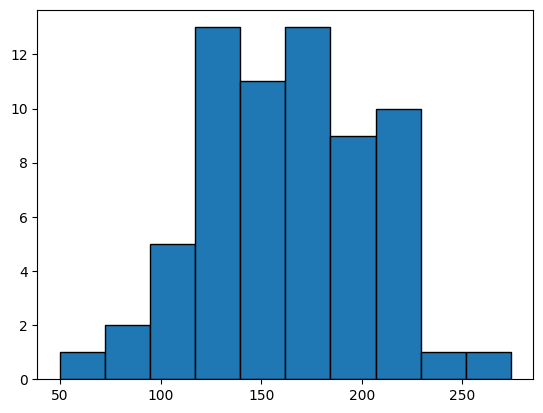

In [ ]:
# taking a look at the distribution of the data
plt.hist(mp19['M_ARREST_NUM'], bins=10, edgecolor='black')
plt.show()

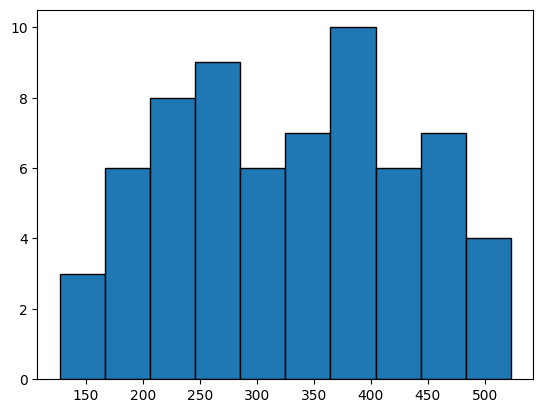

In [ ]:
plt.hist(mp73['M_ARREST_NUM'], bins=10, edgecolor='black')
plt.show()

In [ ]:
# assuming this data meets conditions for the t-test (normality, similar variances, independent), I'll run the test
import scipy.stats as stats

ues = mp19['M_ARREST_NUM']
br = mp73['M_ARREST_NUM']
t_stat, p_value = stats.ttest_ind(ues, br)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

T-statistic: -12.051550677757769
P-value: 6.384527137082858e-23
